In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Total_weather_dataset_in_HCM.csv')
del df['Unnamed: 0']
df

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date
0,12:00 AM,79 °F,75 °F,89 %,ESE,6 mph,0 mph,29.88 in,0.0 in,2022-11-05
1,12:30 AM,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05
2,1:00 AM,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05
3,1:30 AM,77 °F,75 °F,94 %,E,5 mph,0 mph,29.85 in,0.0 in,2022-11-05
4,2:00 AM,75 °F,75 °F,100 %,E,6 mph,0 mph,29.85 in,0.0 in,2022-11-05
...,...,...,...,...,...,...,...,...,...,...
4573,9:30 PM,81 °F,77 °F,89 %,VAR,1 mph,0 mph,29.73 in,0.0 in,2022-08-02
4574,10:00 PM,81 °F,77 °F,89 %,SW,3 mph,0 mph,29.76 in,0.0 in,2022-08-02
4575,10:30 PM,81 °F,77 °F,89 %,SW,5 mph,0 mph,29.76 in,0.0 in,2022-08-02
4576,11:00 PM,81 °F,77 °F,89 %,SW,6 mph,0 mph,29.76 in,0.0 in,2022-08-02


In [3]:
df['DateTime']=pd.to_datetime(df['Date'] + ' ' + df['Time'])
df

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date,DateTime
0,12:00 AM,79 °F,75 °F,89 %,ESE,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 00:00:00
1,12:30 AM,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 00:30:00
2,1:00 AM,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 01:00:00
3,1:30 AM,77 °F,75 °F,94 %,E,5 mph,0 mph,29.85 in,0.0 in,2022-11-05,2022-11-05 01:30:00
4,2:00 AM,75 °F,75 °F,100 %,E,6 mph,0 mph,29.85 in,0.0 in,2022-11-05,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4573,9:30 PM,81 °F,77 °F,89 %,VAR,1 mph,0 mph,29.73 in,0.0 in,2022-08-02,2022-08-02 21:30:00
4574,10:00 PM,81 °F,77 °F,89 %,SW,3 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 22:00:00
4575,10:30 PM,81 °F,77 °F,89 %,SW,5 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 22:30:00
4576,11:00 PM,81 °F,77 °F,89 %,SW,6 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 23:00:00


In [4]:
df_1 = df.loc[df["Date"]=="2022-11-02"]
df_1

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date,DateTime
121,12:00 AM,79 °F,77 °F,94 %,VAR,3 mph,0 mph,29.79 in,0.0 in,2022-11-02,2022-11-02 00:00:00
122,12:30 AM,79 °F,77 °F,94 %,SE,6 mph,0 mph,29.79 in,0.0 in,2022-11-02,2022-11-02 00:30:00
123,1:00 AM,79 °F,77 °F,94 %,SE,5 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 01:00:00
124,1:30 AM,79 °F,77 °F,94 %,SE,5 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 01:30:00
125,2:00 AM,77 °F,77 °F,100 %,VAR,2 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 02:00:00
126,2:30 AM,77 °F,77 °F,100 %,SE,5 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 02:30:00
127,3:00 AM,77 °F,75 °F,94 %,ESE,2 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 03:00:00
128,3:30 AM,77 °F,75 °F,94 %,SE,3 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 03:30:00
129,4:00 AM,77 °F,75 °F,94 %,ESE,3 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 04:00:00
130,4:30 AM,77 °F,75 °F,94 %,VAR,2 mph,0 mph,29.76 in,0.0 in,2022-11-02,2022-11-02 04:30:00


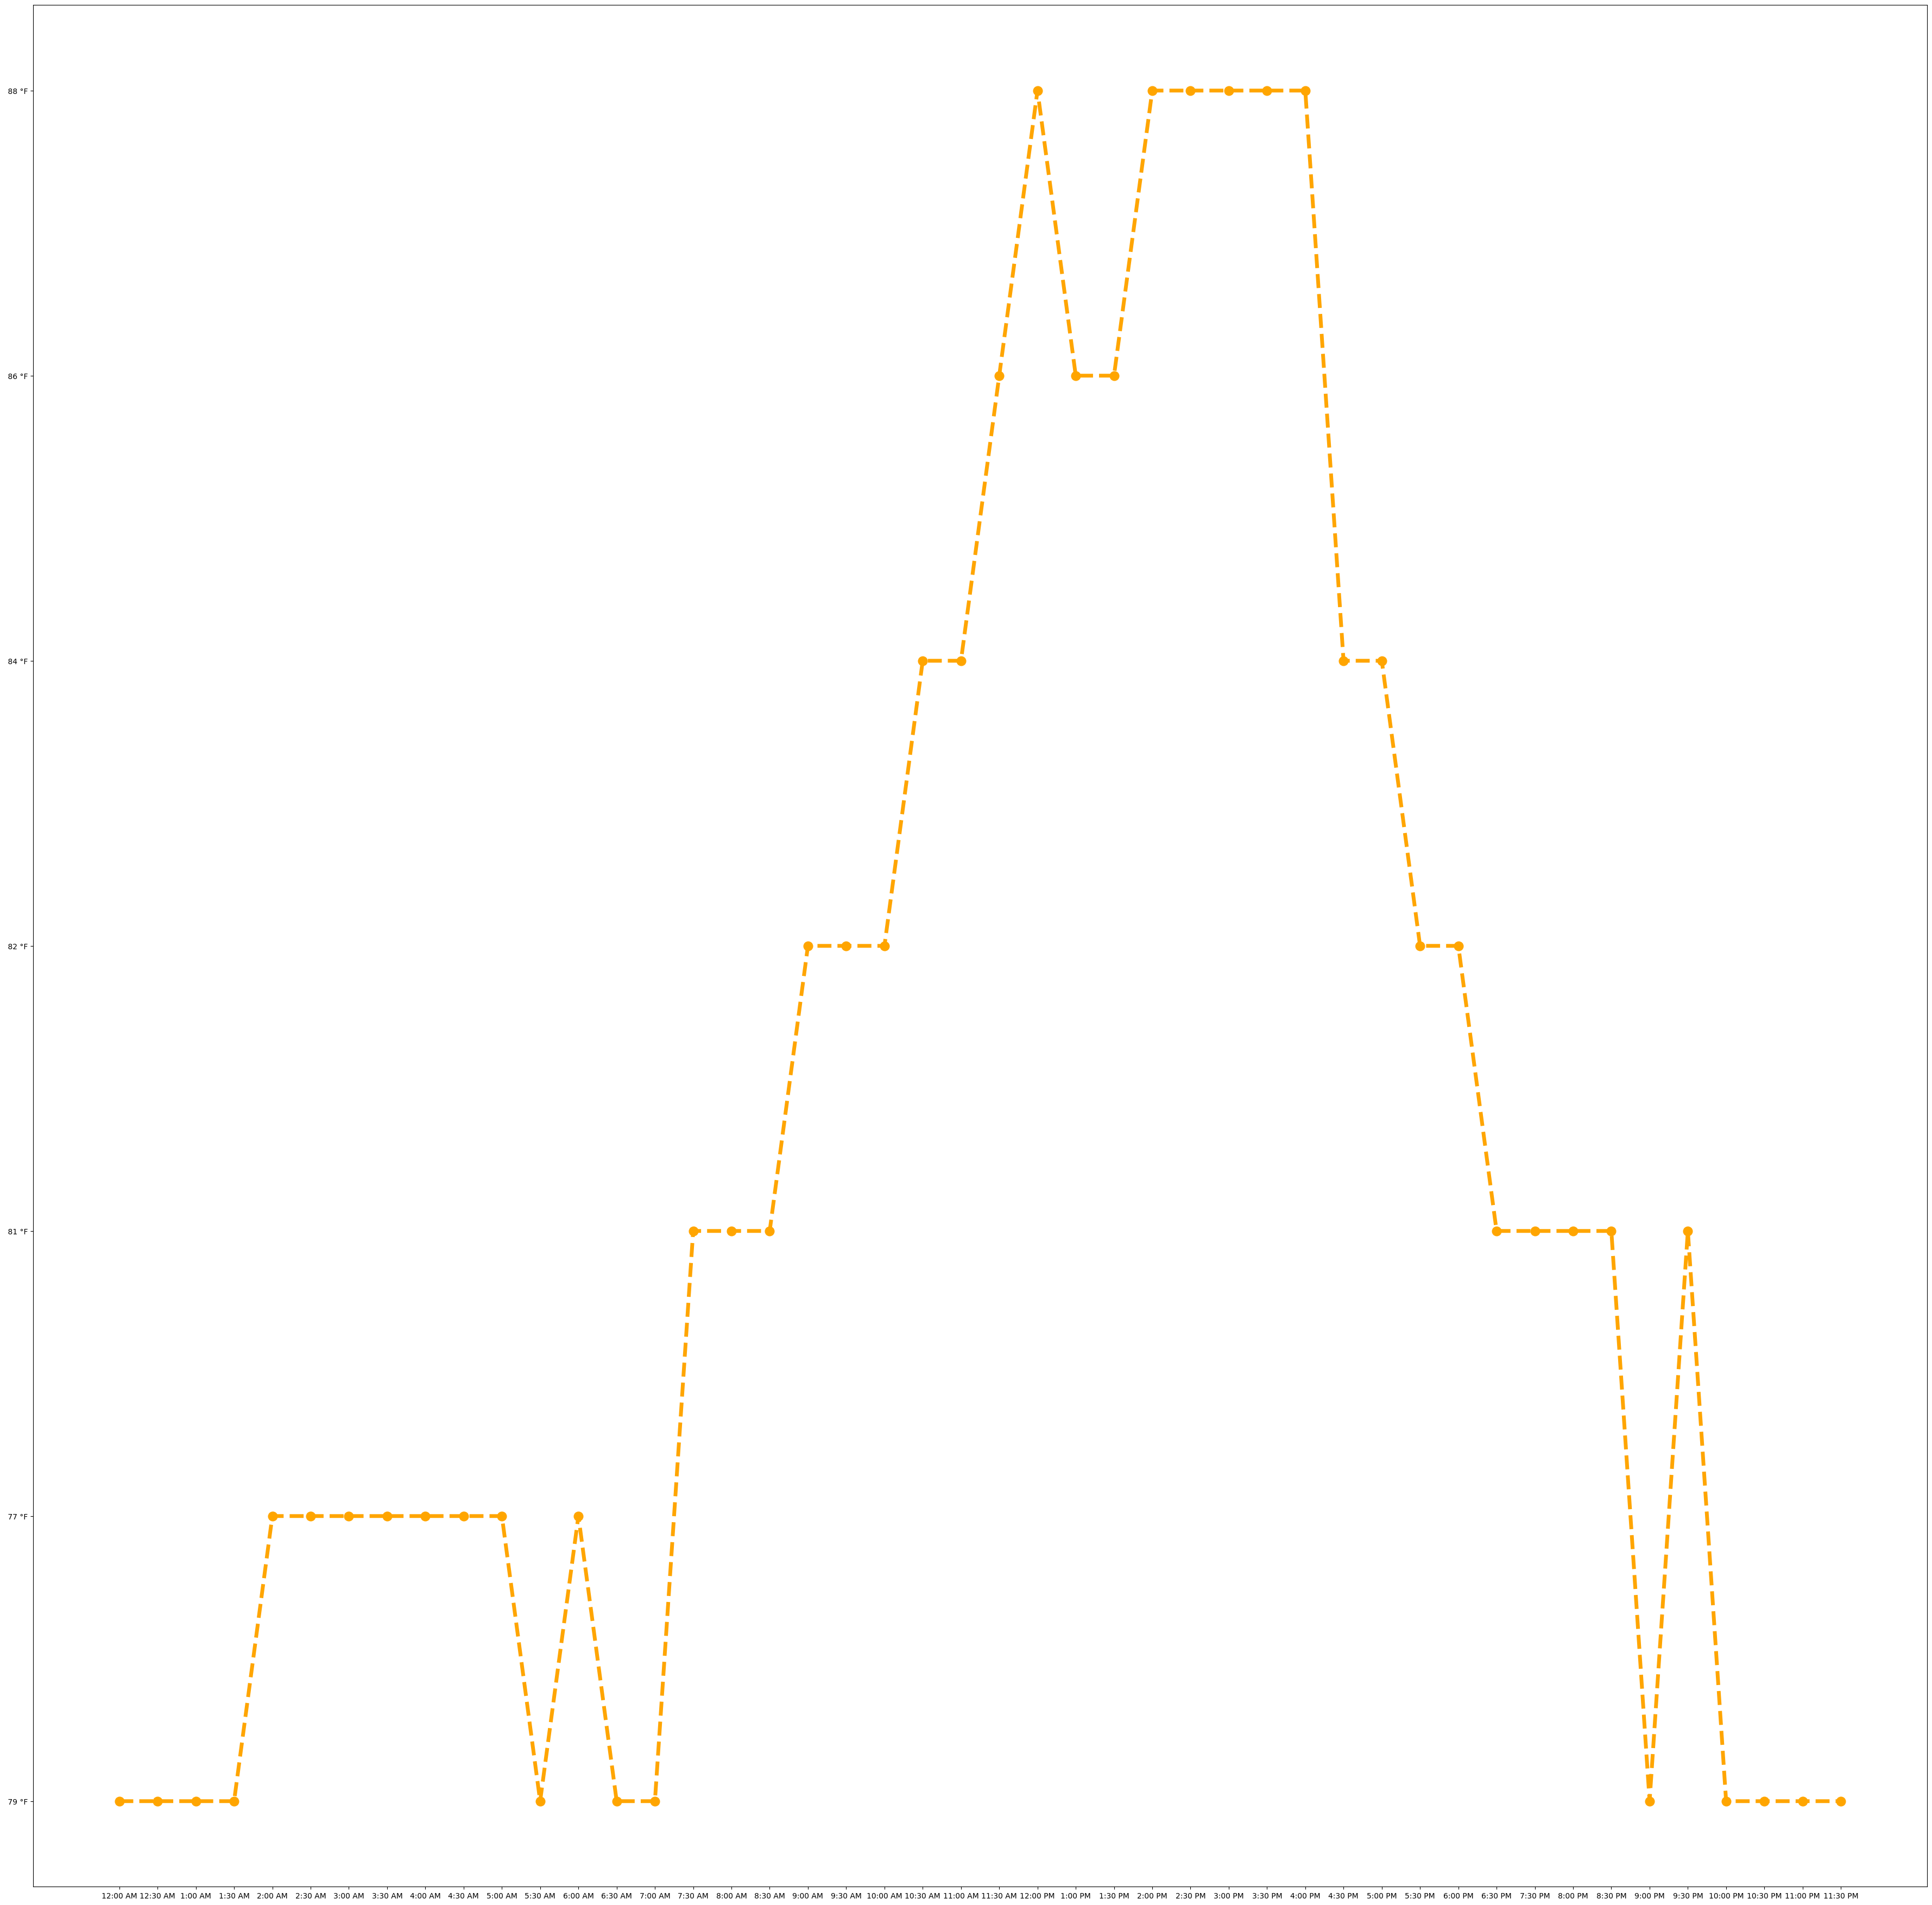

In [5]:
plt.figure(figsize=(45,45),facecolor='w') 
plt.plot(df_1['Time'], df_1['Temperature'], color='orange',marker='o', linestyle='dashed',
     linewidth=5, markersize=12)
# plt.show()
plt.savefig("image.png",bbox_inches='tight',dpi=100)